First to do this we need to be able to get the poses of all the dots and the lamp.

In [7]:
%pylab inline
import rospy, tf
import vrep_common.srv
import geometry_msgs.msg, std_msgs.msg
import time
import matplotlib.pyplot as plt
import pylab
import numpy as np

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
rospy.init_node('point_illumination')

In [10]:
listener=tf.TransformListener()

In [13]:
trans, rot = listener.lookupTransform('/world', '/dummy0', rospy.Time(0))
trans

(0.3999999761581421, 0.17500001192092896, 0.0)

In [57]:
trans, rot = listener.lookupTransform('/world', '/Cuboid0', rospy.Time(0))
trans, rot

((-0.05138549953699112, 0.17499940097332, 0.049999918788671494),
 (-1.1033262818300586e-07,
  -1.1111143986351964e-08,
  -0.002184421984563194,
  0.9999976141474444))

In [133]:
trans, rot = listener.lookupTransform('/world', '/head0', rospy.Time(0))
trans, rot

((0.02592177502810955, 0.19910678267478943, 0.17499993741512299),
 (-3.015081205453725e-06,
  -6.024696546958827e-08,
  0.001535913019848013,
  0.9999988204803549))

In [134]:
headtrans, headrot = trans, rot

simple light model: cone

In [135]:
headmat = listener.fromTranslationRotation(headtrans, headrot)

In [136]:
headmat * np.matrix([[0,
                    0,
                    0,
                    1]]).T

matrix([[ 0.02592178],
        [ 0.19910678],
        [ 0.17499994],
        [ 1.        ]])

In [137]:
headmat * np.matrix([[1,
                    0,
                    0,
                    1]]).T

matrix([[ 1.02591706],
        [ 0.20217861],
        [ 0.17500005],
        [ 1.        ]])

In [138]:
point0= headmat * np.matrix([[0,
                    0,
                    0,
                    1]]).T

In [139]:
direction_vector = headmat * np.matrix([[1, 0, 0, 1]]).T - point0
direction_vector

matrix([[  9.99995282e-01],
        [  3.07182242e-03],
        [  1.11231984e-07],
        [  0.00000000e+00]])

In [140]:
dummypos, dummyrot = listener.lookupTransform('/world', '/dummy0', rospy.Time(0))
dummypos

(0.3999999761581421, 0.17500001192092896, 0.0)

In [141]:
dummypos_vect = np.matrix([[dummypos[0], dummypos[1], dummypos[2], 1]]).T
dummypos_vect

matrix([[ 0.39999998],
        [ 0.17500001],
        [ 0.        ],
        [ 1.        ]])

In [142]:
direction_vector.A1

array([  9.99995282e-01,   3.07182242e-03,   1.11231984e-07,
         0.00000000e+00])

In [143]:
np.dot(direction_vector.A1, direction_vector.A1)

1.0000000000000004

In [144]:
dist = np.dot(direction_vector.A1, dummypos_vect.A1)
dist

0.40053565789476359

In [154]:
cone_len = 10.0
cone_r = 10.0
radius_at_point = (dist / cone_len) * cone_r
radius_at_point

0.40053565789476359

In [146]:
dist_vect = dist * direction_vector
dist_vect

matrix([[  4.00533768e-01],
        [  1.23037441e-03],
        [  4.45523758e-08],
        [  0.00000000e+00]])

In [147]:
np.dot(dist_vect.A1, dist_vect.A1)

0.16042881324519115

In [148]:
dist**2

0.16042881324519109

In [149]:
rel_vect = dummypos_vect - point0
rel_vect

matrix([[ 0.3740782 ],
        [-0.02410677],
        [-0.17499994],
        [ 0.        ]])

In [150]:
to_get_distance = (rel_vect - dist_vect).A1

In [151]:
ortho_dist = np.sqrt(np.dot(to_get_distance, to_get_distance))
ortho_dist

0.1787927896752767

In [156]:
radius_at_point

0.40053565789476359

In [152]:
tf.transformations.euler_from_matrix(headmat)

(-6.030340366446352e-06, -1.1123198385550729e-07, 0.003071827247801011)

In [157]:
dummypos, dummyrot = listener.lookupTransform('/world', '/dummy0', rospy.Time(0))
dummypos_vect = np.matrix([[dummypos[0], dummypos[1], dummypos[2], 1]]).T

In [164]:
trans, rot = listener.lookupTransform('/world', '/head0', rospy.Time(0))
headtrans, headrot = trans, rot
headmat = listener.fromTranslationRotation(headtrans, headrot)
point0= headmat * np.matrix([[0, 0, 0, 1]]).T
direction_vector = headmat * np.matrix([[1, 0, 0, 1]]).T - point0

dummypos, dummyrot = listener.lookupTransform('/world', '/dummy0', rospy.Time(0))
dummypos_vect = np.matrix([[dummypos[0], dummypos[1], dummypos[2], 1]]).T

dist = np.dot(direction_vector.A1, dummypos_vect.A1)

cone_len = 10.0
cone_r = 10.0
radius_at_point = (dist / cone_len) * cone_r

rel_vect = dummypos_vect - point0
to_get_distance = (rel_vect - dist_vect).A1
ortho_dist = np.sqrt(np.dot(to_get_distance, to_get_distance))
print ortho_dist, radius_at_point

0.1829509649 0.400536908028


In [168]:
tf.transformations.quaternion_from_euler(0,0,np.pi)

AttributeError: 'numpy.ndarray' object has no attribute 'tuple'

In [169]:
tuple(tf.transformations.quaternion_from_euler(0,0,np.pi))

(0.0, 0.0, 1.0, 6.123233995736766e-17)

In [163]:
angle = np.pi/8


In [262]:
def orthodist_radatpoint(headpose, dummypose, cone_h=10.0, cone_r=10.0):
    headtrans, headrot = headpose
    dummytrans, dummyrot = dummypose

    headmat = listener.fromTranslationRotation(headtrans, headrot)
    point0= headmat * np.matrix([[0, 0, 0, 1]]).T
    direction_vector = headmat * np.matrix([[1, 0, 0, 1]]).T - point0

    dummypos_vect = np.matrix([[dummytrans[0], dummytrans[1], dummytrans[2], 1]]).T

    dist = np.dot(direction_vector.A1, dummypos_vect.A1)

    radius_at_point = (dist / cone_h) * cone_r

    rel_vect = dummypos_vect - point0
    to_get_distance = (rel_vect - dist_vect).A1
    ortho_dist = np.sqrt(np.dot(to_get_distance, to_get_distance))
    return ortho_dist, radius_at_point, dist

In [174]:
trans, rot = listener.lookupTransform('/world', '/head0', rospy.Time(0))
headtrans, headrot = trans, rot
dummypos, dummyrot = listener.lookupTransform('/world', '/dummy0', rospy.Time(0))

In [175]:
headtrans, rot

((0.09164687991142273, 0.19910240173339844, 0.1749998927116394),
 (-2.5067404123847763e-06,
  -3.0198840555761974e-08,
  0.0015484818617616427,
  0.9999988010981009))

In [177]:
HEADTRANS

(0.09164687991142273, 0.19910240173339844, 0.1749998927116394)

In [167]:
orthodist_radatpoint((headtrans, headrot), (dummypos, dummyrot))

(0.18825173353769523, 0.4005375411989619)

In [170]:
def headpose_from_xyz_rot(x, y, z, rot):
    quat= tuple(tf.transformations.quaternion_from_euler(0,0,rot))
    return (x, y, z), quat

In [173]:
headpose_from_xyz_rot(headtrans[0], headtrans[1], headtrans[2], 0)

((0.08009250462055206, 0.1991049349308014, 0.17499993741512299),
 (0.0, 0.0, 0.0, 1.0))

In [210]:
orthodist_radatpoint(
    headpose_from_xyz_rot(0, 0, 0, 0),
    headpose_from_xyz_rot(0, 0, 0, 0)
    )

(0.17377045736732252, 0.39999997615814209)

In [183]:
np.linspace(-1.0, 1.0)

array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
       -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
       -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
       -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
       -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
        0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
        0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
        0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
        0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
        0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ])

In [ ]:
headpose_from_xyz_rot(0, 0, 0, math.pi/2)

In [280]:
xs = []
ys = []
orthodists = []
radii = []
for x in np.linspace(-1.0, 1.0, 100):
    for y in np.linspace(-1.0, 1.0, 100):
        xs.append(x)
        ys.append(y)
        results  = orthodist_radatpoint(
            headpose_from_xyz_rot(0, 0, 0, math.pi/200),
            headpose_from_xyz_rot(x, y, 0, 0),
            10.,
            10.
            )
        orthodist = results[0]
        radius = results[1]
        dist = results[2]
        light = radius-orthodist
        orthodists.append(light)
        radii.append(radius)

<matplotlib.colorbar.Colorbar instance at 0x7f9ece1184d0>

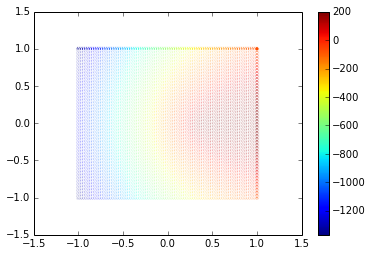

In [283]:
plt.scatter(xs, ys, c=500.*np.array(orthodists), edgecolor='white', linewidths)
plt.colorbar()

In [287]:
img=np.ndarray(shape=(480, 640), dtype=float)

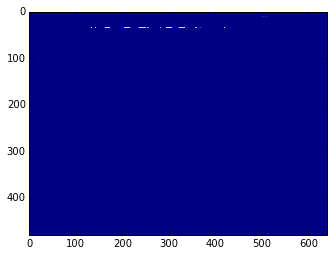

In [289]:
plt.imshow(img)

In [292]:
xs = np.linspace(-1.0, 1.0, 1000)
ys = np.linspace(-1.0, 1.0, 1000)
img=np.ndarray(shape=(len(ys), len(xs)), dtype=float)
orthodists = []
radii = []
for i in xrange(len(xs)):
    for j in xrange(len(ys)):
        x = xs[i]
        y = ys[j]
        
#         xs.append(x)
#         ys.append(y)
        results  = orthodist_radatpoint(
            headpose_from_xyz_rot(0, 0, 0, math.pi/200),
            headpose_from_xyz_rot(x, y, 0, 0),
            10.,
            10.
            )
        orthodist = results[0]
        radius = results[1]
        dist = results[2]
        light = radius-orthodist
        
        img[i][j] = light
#         orthodists.append(light)
#         radii.append(radius)

<matplotlib.colorbar.Colorbar instance at 0x7f9ecdce7a28>

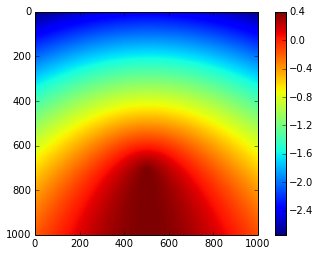

In [293]:
plt.imshow(img)
plt.colorbar()

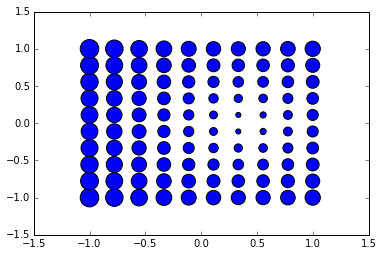

In [248]:
plt.scatter(xs, ys, s=200.*np.array(orthodists))

/usr/lib/pymodules/python2.7/matplotlib/collections.py:717: RuntimeWarning: invalid value encountered in sqrt
  for x in self._sizes]


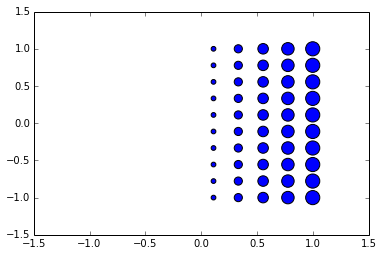

In [243]:
plt.scatter(xs, ys, s=200.*np.array(radii))

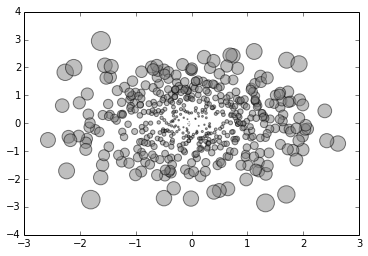

In [180]:
# Generating a Gaussion dataset:
# creating random vectors from the multivariate normal distribution 
# given mean and covariance 
mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[1,0],[0,1]])
X = np.random.multivariate_normal(mu_vec1, cov_mat1, 500)

R = X**2
R_sum = R.sum(axis=1)
plt.scatter(X[:, 0], X[:, 1], 
            color='gray', 
            marker='o', 
            s=32. * R_sum,
            edgecolor='black',
            alpha=0.5)

In [187]:
X.shape

(500, 2)

In [220]:
headpose = headpose_from_xyz_rot(0, 0, 0, 0)
dummypose = headpose_from_xyz_rot(1, 1, 0, 0)
cone_h = 10.
cone_r = 10.

In [228]:
headtrans, headrot = headpose
dummytrans, dummyrot = dummypose

headmat = listener.fromTranslationRotation(headtrans, headrot)
point0= headmat * np.matrix([[0, 0, 0, 1]]).T
direction_vector = headmat * np.matrix([[1, 0, 0, 1]]).T - point0

dummypos_vect = np.matrix([[dummytrans[0], dummytrans[1], dummytrans[2], 1]]).T

dist = np.dot(direction_vector.A1, dummypos_vect.A1)

radius_at_point = (dist / cone_h) * cone_r

rel_vect = dummypos_vect - point0
to_get_distance = (rel_vect - dist_vect).A1
ortho_dist = np.sqrt(np.dot(to_get_distance, to_get_distance))

In [229]:
ortho_dist

1.1648607333630079

In [230]:
headmat

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [226]:
direction_vector

matrix([[ 1.],
        [ 0.],
        [ 0.],
        [ 0.]])